In [7]:
import numpy as np
from scripts.model import unet_3d
import matplotlib.pyplot as plt
from scripts.display_widget import display_prediction
from scripts.load_data import get_data
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)


In [8]:
# Root Directory
root_dir = r"data\cerebellum_data"


In [9]:
test_size = 0.3

# Load the training data
patch_size = (64, 64, 64)
X_train, X_test, Y_train, Y_test = get_data(root_dir, patch_size, test_size)


Test Images Paths: 
data\cerebellum_data\image\tc1_272614-ob_c.nii.gz
data\cerebellum_data\image\tc1_276388-ob_c.nii.gz
data\cerebellum_data\image\tc1_272613-ob_c.nii.gz
data\cerebellum_data\image\tc1_275324-ob_c.nii.gz
data\cerebellum_data\image\tc1_269455-ob_c.nii.gz
data\cerebellum_data\image\tc1_272719-ob_c.nii.gz
data\cerebellum_data\image\tc1_275320-ob_c.nii.gz
data\cerebellum_data\image\tc1_276242-ob_c.nii.gz
data\cerebellum_data\image\tc1_272718-ob_c.nii.gz


In [10]:
# Print the shapes of the data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", Y_test.shape)



X_train shape:  (304, 64, 64, 64, 1)
y_train shape:  (304, 64, 64, 64, 2)
X_test shape:  (144, 64, 64, 64, 1)
y_test shape:  (144, 64, 64, 64, 2)


In [11]:
# Create a 3D U-Net model

model_name = os.path.basename(root_dir)[:-5] + "_model"

# Creates model checkpoints in the given path each time the validation loss improves
checkpoint_path = f"./checkpoints/{model_name}_checkpoint.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      monitor='val_loss',
                                                      verbose=1,
                                                      save_best_only=True,
                                                      mode='min',
                                                      save_weights_only=False
                                                      )


num_classes = 2
input_shape =  patch_size + (1,)

model = unet_3d(input_shape=input_shape,
                num_classes=num_classes
                )

model._name = model_name

# Display the model summary
model.summary()


Model: "cerebellum_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 64,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv3d_15 (Conv3D)             (None, 64, 64, 64,   448         ['input_2[0][0]']                
                                16)                                                               
                                                                                                  
 batch_normalization_14 (BatchN  (None, 64, 64, 64,   64         ['conv3d_15[0][0]']              
 ormalization)                  16)                                                

In [12]:
batch_size = 10
epochs = 50

# Train the model
history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test),
            callbacks=[model_checkpoint]
          )



Epoch 1/50
31/31 [==============================] - ETA: 0s - loss: 0.5484 - dice_coef: 0.5193
Epoch 1: val_loss improved from inf to 0.56013, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 490ms/step - loss: 0.5484 - dice_coef: 0.5193 - val_loss: 0.5601 - val_dice_coef: 0.5059
Epoch 2/50
31/31 [==============================] - ETA: 0s - loss: 0.4426 - dice_coef: 0.6226
Epoch 2: val_loss improved from 0.56013 to 0.54835, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 513ms/step - loss: 0.4426 - dice_coef: 0.6226 - val_loss: 0.5484 - val_dice_coef: 0.5169
Epoch 3/50
31/31 [==============================] - ETA: 0s - loss: 0.3969 - dice_coef: 0.6687
Epoch 3: val_loss improved from 0.54835 to 0.53185, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 515ms/step - loss: 0.3969 - dice_coef: 0.6687 - val_loss: 0.5319 - val_dice_coef: 0.5329
Epoch 4/50
31/31 [==============================] - ETA: 0s - loss: 0.3655 - dice_coef: 0.6991
Epoch 4: val_loss improved from 0.53185 to 0.52186, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 506ms/step - loss: 0.3655 - dice_coef: 0.6991 - val_loss: 0.5219 - val_dice_coef: 0.5423
Epoch 5/50
31/31 [==============================] - ETA: 0s - loss: 0.3398 - dice_coef: 0.7241
Epoch 5: val_loss improved from 0.52186 to 0.51505, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 17s 532ms/step - loss: 0.3398 - dice_coef: 0.7241 - val_loss: 0.5150 - val_dice_coef: 0.5485
Epoch 6/50
31/31 [==============================] - ETA: 0s - loss: 0.3224 - dice_coef: 0.7409
Epoch 6: val_loss improved from 0.51505 to 0.48864, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 17s 552ms/step - loss: 0.3224 - dice_coef: 0.7409 - val_loss: 0.4886 - val_dice_coef: 0.5742
Epoch 7/50
31/31 [==============================] - ETA: 0s - loss: 0.3063 - dice_coef: 0.7561
Epoch 7: val_loss improved from 0.48864 to 0.45992, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 516ms/step - loss: 0.3063 - dice_coef: 0.7561 - val_loss: 0.4599 - val_dice_coef: 0.6023
Epoch 8/50
31/31 [==============================] - ETA: 0s - loss: 0.2932 - dice_coef: 0.7687
Epoch 8: val_loss improved from 0.45992 to 0.42438, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 486ms/step - loss: 0.2932 - dice_coef: 0.7687 - val_loss: 0.4244 - val_dice_coef: 0.6372
Epoch 9/50
31/31 [==============================] - ETA: 0s - loss: 0.2834 - dice_coef: 0.7777
Epoch 9: val_loss improved from 0.42438 to 0.41381, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 486ms/step - loss: 0.2834 - dice_coef: 0.7777 - val_loss: 0.4138 - val_dice_coef: 0.6470
Epoch 10/50
31/31 [==============================] - ETA: 0s - loss: 0.2720 - dice_coef: 0.7884
Epoch 10: val_loss improved from 0.41381 to 0.39355, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 488ms/step - loss: 0.2720 - dice_coef: 0.7884 - val_loss: 0.3936 - val_dice_coef: 0.6667
Epoch 11/50
31/31 [==============================] - ETA: 0s - loss: 0.2653 - dice_coef: 0.7945
Epoch 11: val_loss improved from 0.39355 to 0.37634, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 495ms/step - loss: 0.2653 - dice_coef: 0.7945 - val_loss: 0.3763 - val_dice_coef: 0.6832
Epoch 12/50
31/31 [==============================] - ETA: 0s - loss: 0.2571 - dice_coef: 0.8020
Epoch 12: val_loss improved from 0.37634 to 0.36203, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 505ms/step - loss: 0.2571 - dice_coef: 0.8020 - val_loss: 0.3620 - val_dice_coef: 0.6969
Epoch 13/50
31/31 [==============================] - ETA: 0s - loss: 0.2453 - dice_coef: 0.8133
Epoch 13: val_loss improved from 0.36203 to 0.34946, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 510ms/step - loss: 0.2453 - dice_coef: 0.8133 - val_loss: 0.3495 - val_dice_coef: 0.7089
Epoch 14/50
31/31 [==============================] - ETA: 0s - loss: 0.2361 - dice_coef: 0.8219
Epoch 14: val_loss improved from 0.34946 to 0.34103, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 482ms/step - loss: 0.2361 - dice_coef: 0.8219 - val_loss: 0.3410 - val_dice_coef: 0.7168
Epoch 15/50
31/31 [==============================] - ETA: 0s - loss: 0.2281 - dice_coef: 0.8293
Epoch 15: val_loss improved from 0.34103 to 0.32373, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 481ms/step - loss: 0.2281 - dice_coef: 0.8293 - val_loss: 0.3237 - val_dice_coef: 0.7345
Epoch 16/50
31/31 [==============================] - ETA: 0s - loss: 0.2215 - dice_coef: 0.8352
Epoch 16: val_loss improved from 0.32373 to 0.30892, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 490ms/step - loss: 0.2215 - dice_coef: 0.8352 - val_loss: 0.3089 - val_dice_coef: 0.7491
Epoch 17/50
31/31 [==============================] - ETA: 0s - loss: 0.2159 - dice_coef: 0.8402
Epoch 17: val_loss did not improve from 0.30892
31/31 [==============================] - 10s 329ms/step - loss: 0.2159 - dice_coef: 0.8402 - val_loss: 0.3322 - val_dice_coef: 0.7249
Epoch 18/50
31/31 [==============================] - ETA: 0s - loss: 0.2106 - dice_coef: 0.8442
Epoch 18: val_loss improved from 0.30892 to 0.29731, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 17s 573ms/step - loss: 0.2106 - dice_coef: 0.8442 - val_loss: 0.2973 - val_dice_coef: 0.7587
Epoch 19/50
31/31 [==============================] - ETA: 0s - loss: 0.2025 - dice_coef: 0.8525
Epoch 19: val_loss improved from 0.29731 to 0.27835, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 571ms/step - loss: 0.2025 - dice_coef: 0.8525 - val_loss: 0.2784 - val_dice_coef: 0.7772
Epoch 20/50
31/31 [==============================] - ETA: 0s - loss: 0.1956 - dice_coef: 0.8587
Epoch 20: val_loss improved from 0.27835 to 0.25454, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 572ms/step - loss: 0.1956 - dice_coef: 0.8587 - val_loss: 0.2545 - val_dice_coef: 0.8000
Epoch 21/50
31/31 [==============================] - ETA: 0s - loss: 0.1901 - dice_coef: 0.8631
Epoch 21: val_loss did not improve from 0.25454
31/31 [==============================] - 9s 280ms/step - loss: 0.1901 - dice_coef: 0.8631 - val_loss: 0.2601 - val_dice_coef: 0.7939
Epoch 22/50
31/31 [==============================] - ETA: 0s - loss: 0.1830 - dice_coef: 0.8700
Epoch 22: val_loss improved from 0.25454 to 0.24648, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 487ms/step - loss: 0.1830 - dice_coef: 0.8700 - val_loss: 0.2465 - val_dice_coef: 0.8068
Epoch 23/50
31/31 [==============================] - ETA: 0s - loss: 0.1782 - dice_coef: 0.8742
Epoch 23: val_loss improved from 0.24648 to 0.21487, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 495ms/step - loss: 0.1782 - dice_coef: 0.8742 - val_loss: 0.2149 - val_dice_coef: 0.8372
Epoch 24/50
31/31 [==============================] - ETA: 0s - loss: 0.1728 - dice_coef: 0.8787
Epoch 24: val_loss improved from 0.21487 to 0.20606, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 512ms/step - loss: 0.1728 - dice_coef: 0.8787 - val_loss: 0.2061 - val_dice_coef: 0.8454
Epoch 25/50
31/31 [==============================] - ETA: 0s - loss: 0.1668 - dice_coef: 0.8842
Epoch 25: val_loss improved from 0.20606 to 0.19302, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 521ms/step - loss: 0.1668 - dice_coef: 0.8842 - val_loss: 0.1930 - val_dice_coef: 0.8579
Epoch 26/50
31/31 [==============================] - ETA: 0s - loss: 0.1618 - dice_coef: 0.8888
Epoch 26: val_loss improved from 0.19302 to 0.18696, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 505ms/step - loss: 0.1618 - dice_coef: 0.8888 - val_loss: 0.1870 - val_dice_coef: 0.8635
Epoch 27/50
31/31 [==============================] - ETA: 0s - loss: 0.1595 - dice_coef: 0.8905
Epoch 27: val_loss improved from 0.18696 to 0.17494, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 593ms/step - loss: 0.1595 - dice_coef: 0.8905 - val_loss: 0.1749 - val_dice_coef: 0.8747
Epoch 28/50
31/31 [==============================] - ETA: 0s - loss: 0.1622 - dice_coef: 0.8863
Epoch 28: val_loss did not improve from 0.17494
31/31 [==============================] - 9s 295ms/step - loss: 0.1622 - dice_coef: 0.8863 - val_loss: 0.1852 - val_dice_coef: 0.8640
Epoch 29/50
31/31 [==============================] - ETA: 0s - loss: 0.1552 - dice_coef: 0.8940
Epoch 29: val_loss improved from 0.17494 to 0.16291, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 600ms/step - loss: 0.1552 - dice_coef: 0.8940 - val_loss: 0.1629 - val_dice_coef: 0.8859
Epoch 30/50
31/31 [==============================] - ETA: 0s - loss: 0.1473 - dice_coef: 0.9012
Epoch 30: val_loss improved from 0.16291 to 0.15710, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 17s 548ms/step - loss: 0.1473 - dice_coef: 0.9012 - val_loss: 0.1571 - val_dice_coef: 0.8913
Epoch 31/50
31/31 [==============================] - ETA: 0s - loss: 0.1456 - dice_coef: 0.9024
Epoch 31: val_loss improved from 0.15710 to 0.15529, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 500ms/step - loss: 0.1456 - dice_coef: 0.9024 - val_loss: 0.1553 - val_dice_coef: 0.8926
Epoch 32/50
31/31 [==============================] - ETA: 0s - loss: 0.1420 - dice_coef: 0.9053
Epoch 32: val_loss improved from 0.15529 to 0.15192, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 567ms/step - loss: 0.1420 - dice_coef: 0.9053 - val_loss: 0.1519 - val_dice_coef: 0.8956
Epoch 33/50
31/31 [==============================] - ETA: 0s - loss: 0.1388 - dice_coef: 0.9082
Epoch 33: val_loss did not improve from 0.15192
31/31 [==============================] - 9s 285ms/step - loss: 0.1388 - dice_coef: 0.9082 - val_loss: 0.1537 - val_dice_coef: 0.8932
Epoch 34/50
31/31 [==============================] - ETA: 0s - loss: 0.1347 - dice_coef: 0.9117
Epoch 34: val_loss improved from 0.15192 to 0.14459, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 525ms/step - loss: 0.1347 - dice_coef: 0.9117 - val_loss: 0.1446 - val_dice_coef: 0.9018
Epoch 35/50
31/31 [==============================] - ETA: 0s - loss: 0.1309 - dice_coef: 0.9152
Epoch 35: val_loss improved from 0.14459 to 0.13895, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 17s 561ms/step - loss: 0.1309 - dice_coef: 0.9152 - val_loss: 0.1389 - val_dice_coef: 0.9070
Epoch 36/50
31/31 [==============================] - ETA: 0s - loss: 0.1295 - dice_coef: 0.9160
Epoch 36: val_loss improved from 0.13895 to 0.13221, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 527ms/step - loss: 0.1295 - dice_coef: 0.9160 - val_loss: 0.1322 - val_dice_coef: 0.9133
Epoch 37/50
31/31 [==============================] - ETA: 0s - loss: 0.1258 - dice_coef: 0.9190
Epoch 37: val_loss improved from 0.13221 to 0.12706, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 489ms/step - loss: 0.1258 - dice_coef: 0.9190 - val_loss: 0.1271 - val_dice_coef: 0.9179
Epoch 38/50
31/31 [==============================] - ETA: 0s - loss: 0.1237 - dice_coef: 0.9208
Epoch 38: val_loss did not improve from 0.12706
31/31 [==============================] - 9s 279ms/step - loss: 0.1237 - dice_coef: 0.9208 - val_loss: 0.1271 - val_dice_coef: 0.9172
Epoch 39/50
31/31 [==============================] - ETA: 0s - loss: 0.1210 - dice_coef: 0.9231
Epoch 39: val_loss improved from 0.12706 to 0.12389, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 521ms/step - loss: 0.1210 - dice_coef: 0.9231 - val_loss: 0.1239 - val_dice_coef: 0.9202
Epoch 40/50
31/31 [==============================] - ETA: 0s - loss: 0.1174 - dice_coef: 0.9263
Epoch 40: val_loss improved from 0.12389 to 0.12064, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 594ms/step - loss: 0.1174 - dice_coef: 0.9263 - val_loss: 0.1206 - val_dice_coef: 0.9228
Epoch 41/50
31/31 [==============================] - ETA: 0s - loss: 0.1158 - dice_coef: 0.9273
Epoch 41: val_loss improved from 0.12064 to 0.11961, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 507ms/step - loss: 0.1158 - dice_coef: 0.9273 - val_loss: 0.1196 - val_dice_coef: 0.9233
Epoch 42/50
31/31 [==============================] - ETA: 0s - loss: 0.1129 - dice_coef: 0.9297
Epoch 42: val_loss improved from 0.11961 to 0.11754, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 504ms/step - loss: 0.1129 - dice_coef: 0.9297 - val_loss: 0.1175 - val_dice_coef: 0.9248
Epoch 43/50
31/31 [==============================] - ETA: 0s - loss: 0.1105 - dice_coef: 0.9314
Epoch 43: val_loss improved from 0.11754 to 0.11556, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 17s 553ms/step - loss: 0.1105 - dice_coef: 0.9314 - val_loss: 0.1156 - val_dice_coef: 0.9264
Epoch 44/50
31/31 [==============================] - ETA: 0s - loss: 0.1099 - dice_coef: 0.9318
Epoch 44: val_loss improved from 0.11556 to 0.11455, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 500ms/step - loss: 0.1099 - dice_coef: 0.9318 - val_loss: 0.1146 - val_dice_coef: 0.9269
Epoch 45/50
31/31 [==============================] - ETA: 0s - loss: 0.1061 - dice_coef: 0.9349
Epoch 45: val_loss improved from 0.11455 to 0.10985, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 568ms/step - loss: 0.1061 - dice_coef: 0.9349 - val_loss: 0.1098 - val_dice_coef: 0.9311
Epoch 46/50
31/31 [==============================] - ETA: 0s - loss: 0.1036 - dice_coef: 0.9367
Epoch 46: val_loss improved from 0.10985 to 0.10796, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 573ms/step - loss: 0.1036 - dice_coef: 0.9367 - val_loss: 0.1080 - val_dice_coef: 0.9325
Epoch 47/50
31/31 [==============================] - ETA: 0s - loss: 0.1016 - dice_coef: 0.9384
Epoch 47: val_loss improved from 0.10796 to 0.10679, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 15s 486ms/step - loss: 0.1016 - dice_coef: 0.9384 - val_loss: 0.1068 - val_dice_coef: 0.9332
Epoch 48/50
31/31 [==============================] - ETA: 0s - loss: 0.1005 - dice_coef: 0.9386
Epoch 48: val_loss improved from 0.10679 to 0.10575, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 17s 533ms/step - loss: 0.1005 - dice_coef: 0.9386 - val_loss: 0.1057 - val_dice_coef: 0.9338
Epoch 49/50
31/31 [==============================] - ETA: 0s - loss: 0.0988 - dice_coef: 0.9404
Epoch 49: val_loss improved from 0.10575 to 0.10125, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 18s 582ms/step - loss: 0.0988 - dice_coef: 0.9404 - val_loss: 0.1012 - val_dice_coef: 0.9378
Epoch 50/50
31/31 [==============================] - ETA: 0s - loss: 0.0964 - dice_coef: 0.9424
Epoch 50: val_loss improved from 0.10125 to 0.10058, saving model to ./checkpoints\cerebellum_model_checkpoint.ckpt
INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


INFO:tensorflow:Assets written to: ./checkpoints\cerebellum_model_checkpoint.ckpt\assets


31/31 [==============================] - 16s 515ms/step - loss: 0.0964 - dice_coef: 0.9424 - val_loss: 0.1006 - val_dice_coef: 0.9380


In [13]:
from scripts.loss import dice_loss, dice_coef

# Evaluate the best model on the test data
best_model = load_model(checkpoint_path, custom_objects={dice_loss.__name__:dice_loss, dice_coef.__name__:dice_coef})

print("Evaluate on test data")
results = best_model.evaluate(X_test, Y_test, batch_size=batch_size)
print("test loss, test acc:", results)


Evaluate on test data
15/15 [==============================] - 2s 74ms/step - loss: 0.1006 - dice_coef: 0.9380
test loss, test acc: [0.10058407485485077, 0.93803870677948]


In [19]:
# Save the best model
best_model.save(f"models/{best_model.name}.h5")

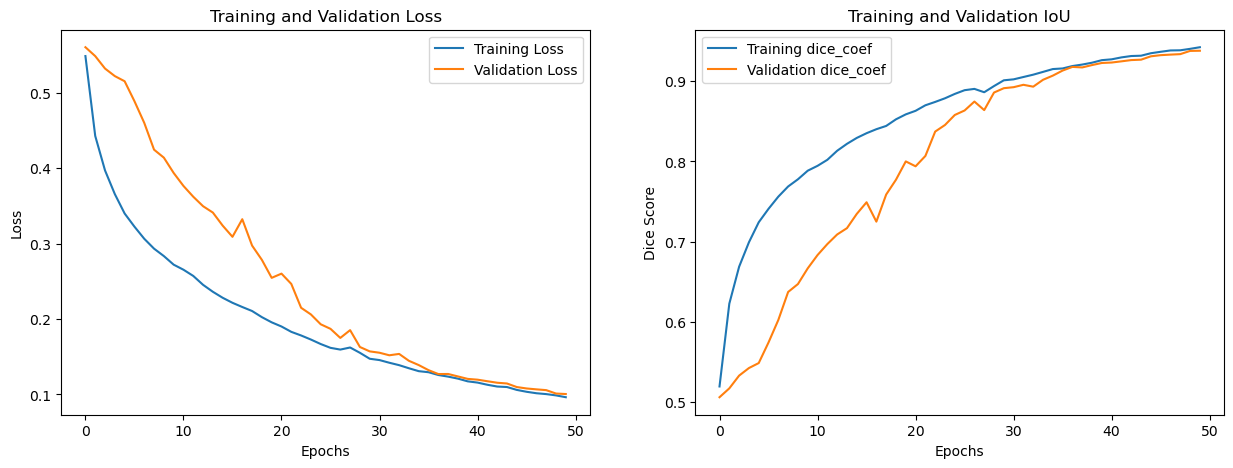

In [15]:
# Show the accuracy of the model over time/epochs

# Get the names of the loss and metric used
loss_name = model.compiled_loss.metrics[0].name
metric_name = model.compiled_metrics.metrics[0].name

# Get the training history of the model
epoch_lst = history.epoch
loss = history.history[loss_name]
metric = history.history[metric_name]
val_loss = history.history["val_" + loss_name]
val_metric = history.history["val_" + metric_name]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Plot loss and validation loss
ax1.plot(epoch_lst, loss, label="Training Loss")
ax1.plot(epoch_lst, val_loss, label="Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Training and Validation Loss")
ax1.legend()

# Plot the training and validation dice score
ax2.plot(epoch_lst, metric, label=f"Training {metric_name}")
ax2.plot(epoch_lst, val_metric, label=f"Validation {metric_name}")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Dice Score")
ax2.set_title("Training and Validation IoU")
ax2.legend()


plt.show()

In [16]:
# Generate predictions (probabilities -- the output of the last layer)

n_patches = 10
print(f"Generate predictions for {n_patches} samples")
predictions = best_model.predict(X_test[:n_patches])
predictions = np.argmax(predictions, axis=-1)
print("predictions shape:", predictions.shape)



Generate predictions for 10 samples
1/1 [==============================] - 0s 426ms/step
predictions shape: (10, 64, 64, 64)


In [17]:
# Extracts a specific patch from the predicted patches to display.

test_patch_num = 5
image = X_test[test_patch_num]
gt = np.argmax(Y_test[test_patch_num], axis=-1)
pred = predictions[test_patch_num]



In [18]:
display_prediction(image, gt, pred)


interactive(children=(Dropdown(description='axes', options=('xy', 'yz', 'xz'), value='xy'), IntSlider(value=0,…